In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd
#!ls -ahl drive/My\ Drive|grep dogs
#!unzip "drive/My Drive/dogs-vs-cats.zip" 
#sourceZipFile = "drive/My Drive/dogs-vs-cats.zip"
#print(os.path.exists(sourceZipFile))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [ ]:
!unzip "/content/drive/My Drive/train.zip"
#!unzip test1.zip
!mkdir source_data
!mv train source_data
#!mv test1 source_data
#!mv sampleSubmission.csv source_data

Archive:  /content/drive/My Drive/train.zip
replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: mkdir: cannot create directory ‘source_data’: File exists
mv: cannot move 'train' to 'source_data/train': Directory not empty


In [ ]:
#!mv source_data/test1 source_data/test
!ls source_data/train

In [ ]:
!rm -Rf cats_and_dogs_small

In [ ]:
import os
#cats pictures for training
fnames = ['cat.{}.jpg'.format(i) for i in range(8000)]
print(fnames[1], fnames[10])

original_dataset_dir = "/content/source_data/train"
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    # print(src)
    dst = os.path.join(train_cats_dir, fname)
    # print(dst)
    shutil.copyfile(src, dst)

cat.1.jpg cat.10.jpg


In [ ]:
!ls cats_and_dogs_small/train/cats

ls: cannot access 'cats_and_dogs_small/train/cats': No such file or directory


In [ ]:
import os, shutil
def createIfNot(pathName):
    if os.path.exists(pathName):
        print(pathName, " Already Exists")
    else:
        os.mkdir(pathName)

original_dataset_dir = "/content/source_data/train"

modelStoragePath = "drive/My Drive/"

base_dir = 'cats_and_dogs_small'
createIfNot(base_dir)
train_dir = os.path.join(base_dir, 'train')
createIfNot(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
createIfNot(validation_dir)
test_dir = os.path.join(base_dir, 'test')
createIfNot(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
createIfNot(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
createIfNot(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
createIfNot(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
createIfNot(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
createIfNot(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
createIfNot(test_dogs_dir)

In [ ]:
#getting 500 cats pictures for validation
fnames = ['cat.{}.jpg'.format(i) for i in range(8000, 10250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
#getting 500 pictures for Test
fnames = ['cat.{}.jpg'.format(i) for i in range(10250, 12499)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
#getting 1000 dogs pics for traing
fnames = ['dog.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#getting 500 dogs pics for testing
fnames = ['dog.{}.jpg'.format(i) for i in range(8000, 10250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

##getting 500 dogs pics for validation
fnames = ['dog.{}.jpg'.format(i) for i in range(10250, 12499)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 8000
total training dog images: 8000
total validation cat images: 2250
total validation dog images: 2250
total test cat images: 2249
total test dog images: 2249


In [ ]:
from tensorflow.keras import datasets, layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 16000 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.


In [ ]:
#testing
#print(type(train_generator))
counter =0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[counter])
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)        

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
1.0
1
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
1.0
2
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
1.0
3
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
1.0
4
4


In [ ]:
import pickle
def saveData(model, history, iteration):
    modelFile = modelStoragePath + "model_cats_dogs_small" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "History_cats_and_dogs_small" + str(iteration).strip() + ".pkle"
    model.save(modelFile)
    #saving history file too
    with open(historyFile, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
    return modelFile, historyFile

import tensorflow.keras.models
def loadData(iteration):
    modelFile = modelStoragePath + "model_cats_dogs_small" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "History_cats_and_dogs_small" + str(iteration).strip() + ".pkle"
    model = models.load_model(modelFile)
    with open(historyFile, 'rb') as file_pi:
        history = pickle.load(file_pi)
    return model, history

In [ ]:
#Listing 5.8 Fitting the model using a batch generator
#Please use Model.fit, which supports generators.
history = model.fit(
train_generator,
steps_per_epoch=70,
epochs=30,
validation_data=validation_generator,
validation_steps=30)

modelFile, HistoryFile = saveData(model, history, iteration=1)
print(modelFile, HistoryFile, "Saved")

Epoch 1/30
70/70 [==============================] - 7s 107ms/step - loss: 0.6941 - acc: 0.5300 - val_loss: 0.6831 - val_acc: 0.6383
Epoch 2/30
70/70 [==============================] - 7s 107ms/step - loss: 0.6796 - acc: 0.5671 - val_loss: 0.6587 - val_acc: 0.6333
Epoch 3/30
70/70 [==============================] - 8s 109ms/step - loss: 0.6637 - acc: 0.5900 - val_loss: 0.6832 - val_acc: 0.5483
Epoch 4/30
70/70 [==============================] - 8s 108ms/step - loss: 0.6288 - acc: 0.6314 - val_loss: 0.5983 - val_acc: 0.6967
Epoch 5/30
70/70 [==============================] - 8s 108ms/step - loss: 0.6150 - acc: 0.6607 - val_loss: 0.6780 - val_acc: 0.5867
Epoch 6/30
70/70 [==============================] - 8s 107ms/step - loss: 0.5966 - acc: 0.6729 - val_loss: 0.5706 - val_acc: 0.7083
Epoch 7/30
70/70 [==============================] - 8s 108ms/step - loss: 0.5733 - acc: 0.7043 - val_loss: 0.5853 - val_acc: 0.6767
Epoch 8/30
70/70 [==============================] - 8s 108ms/step - loss: 0.

In [ ]:
print(type(history))
modelFile, HistoryFile = saveData(model, history, iteration=1)
print(modelFile, HistoryFile, "Saved")

<class 'tensorflow.python.keras.callbacks.History'>
drive/My Drive/model_cats_dogs_small1.h5 drive/My Drive/History_cats_and_dogs_small1.pkle Saved


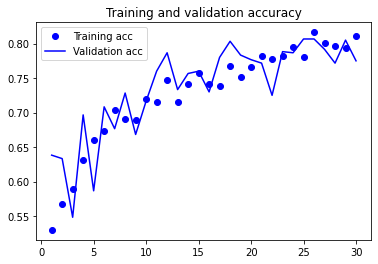

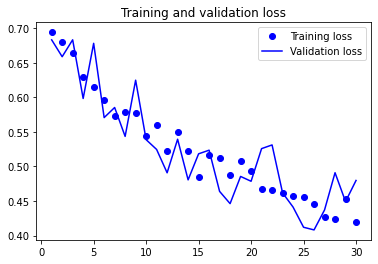

In [ ]:

#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


#Listing 5.11 Setting up a data augmentation configuration via ImageDataGenerator

In [ ]:
#Listing 5.11 Setting up a data augmentation configuration via ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

Using TensorFlow backend.


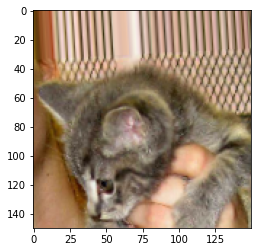

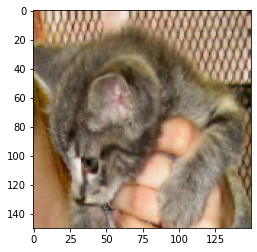

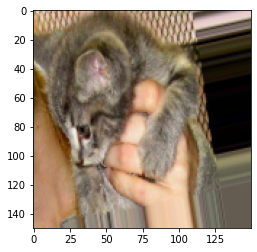

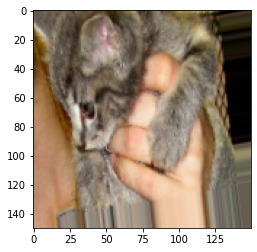

In [ ]:
#Listing 5.12 Displaying some randomly augmented training images
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[100]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
#Listing 5.13 Defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [ ]:
#Listing 5.14 Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')



Found 16000 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/100
100/100 [==============================] - 33s 327ms/step - loss: 0.6945 - acc: 0.5022 - val_loss: 0.6882 - val_acc: 0.4956
Epoch 2/100
100/100 [==============================] - 33s 328ms/step - loss: 0.6871 - acc: 0.5525 - val_loss: 0.6687 - val_acc: 0.6431
Epoch 3/100
100/100 [==============================] - 33s 330ms/step - loss: 0.6694 - acc: 0.5934 - val_loss: 0.6563 - val_acc: 0.6000
Epoch 4/100
100/100 [==============================] - 33s 332ms/step - loss: 0.6438 - acc: 0.6300 - val_loss: 0.7739 - val_acc: 0.5312
Epoch 5/100
100/100 [==============================] - 33s 330ms/step - loss: 0.6503 - acc: 0.6294 - val_loss: 0.6007 - val_acc: 0.6769
Epoch 6/100
100/100 [==============================] - 33s 333ms/step - loss: 0.6243 - acc: 0.6503 - val_loss: 0.6057 - val_acc: 0.6669
Epoch 7/100
100/100 [==============================] - 33s 333ms/step - loss: 0.6170 - acc: 0.6584 - val_loss: 0.5692 - val_acc: 0.7094
Epoch 8/100
100/100 [===========================

In [ ]:
modelFile, historyFile = saveData(model, history, iteration = 2)
print(modelFile, historyFile, " Saved")

drive/My Drive/model_cats_dogs_small2.h5 drive/My Drive/History_cats_and_dogs_small2.pkle  Saved


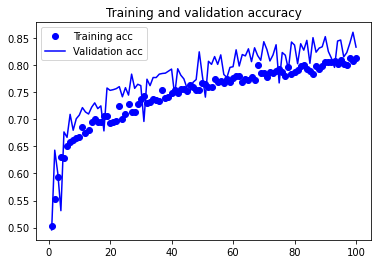

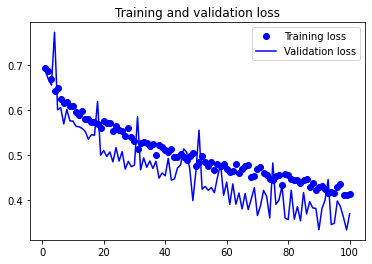

In [ ]:

#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history

acc = history['acc']
val_acc = history['val_acc']

loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()